In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from scipy import optimize
import statsmodels.api as sm
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import math

import datetime
from pytz import timezone
from datetime import datetime
from pytz import country_timezones
from pandas.core import datetools

#http://www.tsjshg.info/udemy/Lec76-79.html

/Users/koyamakyouhei/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [75]:

"""
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])
"""
ObjectiveFilename = r"/Users/koyamakyouhei/JupiterWorkspace/WeatherData/train_kwh.tsv"
sample_submit = r"/Users/koyamakyouhei/JupiterWorkspace/WeatherData/sample_submit.tsv"
amd_11001 = r"/Users/koyamakyouhei/JupiterWorkspace/WeatherData/amd1/amd_11001.tsv"

#df = pd.read_csv(r'C:/Users/161288/Documents/Honda_BoM/Jupyter/HondaData.csv')
#df_views = pd.read_csv(r'C:/Users/161288/Documents/Jupyter/pageviews-14-jun.csv')
#df_click = pd.read_csv(r'C:/Users/161288/Documents/Jupyter/clicks-14-jun.csv')

df_train_kwh = pd.read_csv(ObjectiveFilename, delimiter='\t' )
df_sample_submit = pd.read_csv(sample_submit, delimiter='\t')
df_amd_11001= pd.read_csv(amd_11001 , delimiter='\t')

## Create Features

In [76]:
"""
amd1				japan
amd2				report.pptx
amd3				sample_submit.tsv
amd4				sfc1
amd5				sfc2
amd_master.tsv			sfc_master.tsv
current_weather_master.txt	train_kwh.tsv
forecast
"""

'\namd1\t\t\t\tjapan\namd2\t\t\t\treport.pptx\namd3\t\t\t\tsample_submit.tsv\namd4\t\t\t\tsfc1\namd5\t\t\t\tsfc2\namd_master.tsv\t\t\tsfc_master.tsv\ncurrent_weather_master.txt\ttrain_kwh.tsv\nforecast\n'

In [77]:
"""df_train_kwh.datetime = pd.to_datetime(df_train_kwh.datetime,
               format="%Y%m%d%H%M%S", 
               #infer_datetime_format=True
              )              
"""

#df_train_kwh.datetime = df_train_kwh.datetime.apply(pd.to_datetime,format="%Y%m%d%H%M%S")

In [78]:
df_train_kwh.head()

,datetime,SOLA01,SOLA02,SOLA03
0,2012-01-01 00:01:00,0,0.0,NaN
1,2012-01-01 00:02:00,0,0.0,NaN
2,2012-01-01 00:03:00,0,0.0,NaN
3,2012-01-01 00:04:00,0,0.0,NaN
4,2012-01-01 00:05:00,0,0.0,NaN


### Visualize

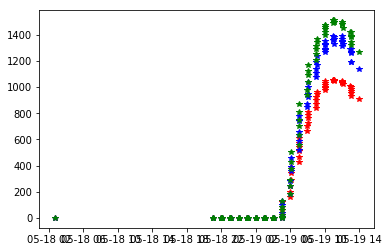

In [69]:
sample_num = 20000
num_length = 100
plt.plot(df_train_kwh.datetime[sample_num:sample_num+num_length], df_train_kwh.SOLA01.values[sample_num:sample_num+num_length],'r*')
plt.plot(df_train_kwh.datetime[sample_num:sample_num+num_length], df_train_kwh.SOLA02.values[sample_num:sample_num+num_length],'b*')
plt.plot(df_train_kwh.datetime[sample_num:sample_num+num_length], df_train_kwh.SOLA03.values[sample_num:sample_num+num_length],'g*')
plt.show()

In [79]:
df_amd_11001

,datetime,pr,f_pr,max_ws,f_max_ws,ave_wv,f_ave_wv,ave_ws,f_ave_ws,max_tp,f_max_tp,min_tp,f_min_tp,sl,f_sl,sd,f_sd,dsd,f_dsd
0,201201010010,0.0,0,67.0,0,15.0,0,56.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
1,201201010020,0.0,0,71.0,0,15.0,0,58.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
2,201201010030,0.0,0,70.0,0,15.0,0,59.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
3,201201010040,0.0,0,73.0,0,15.0,0,58.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
4,201201010050,0.0,0,70.0,0,15.0,0,59.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
5,201201010100,0.0,0,70.0,0,15.0,0,51.0,0,-25.0,0,-27.0,0,0.0,2,NaN,56,NaN,56
6,201201010110,0.0,0,71.0,0,15.0,0,58.0,0,-25.0,0,-27.0,0,0.0,2,NaN,56,NaN,56
7,201201010120,0.0,0,70.0,0,14.0,0,56.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
8,201201010130,0.0,0,70.0,0,14.0,0,52.0,0,-25.0,0,-26.0,0,0.0,2,NaN,56,NaN,56
9,201201010140,0.0,0,73.0,0,14.0,0,61.0,0,-23.0,0,-25.0,0,0.0,2,NaN,56,NaN,56


### Window size

In [3]:
df_views["browser_size"] = df_views.browser_window_height.values * df_views.browser_window_width.values
df_views.groupby(by='user_id').mean()[["browser_size"]].to_csv('July_BrowserSizeByUID.csv')

In [4]:
#a = df_views.isin(df_click.user_id.values).user_id.values
df_click.user_id.rename('click_user_id')
temp = df_views.isin(df_click.user_id.values).user_id.rename('click_user_True') #if users in Views click, then they have True in click_user_True.
print (df_click.columns)

NameError: name 'df_click' is not defined

### Country

In [3]:
CountryList = df_views.country_code.unique()

In [4]:
def to_numerical_country(row):
    #print (row)
    country = row['country_code']
    row[country] = 1
    return row
    

In [5]:
temp = pd.DataFrame(index=df_views.index,columns=CountryList)

In [6]:
len(temp.index), len(df_views.index)

(825194, 825194)

In [7]:
df_views = pd.concat([df_views,temp],axis=1)

In [10]:
View_num_country = df_views.apply(to_numerical_country,axis=1)
View_num_country.to_csv('July_Country_num.csv')
#View_num_country.groupby('user_id').sum().to_csv('July_CountryByUID.csv')

TypeError: unorderable types: str() < float()

In [43]:
View_num_country = pd.read_csv('July_Country_num.csv')

C:\Users\161288\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
unnec = [ 'page_hash', 'site_section', 'unixtimestamp', 'country_code',
       'referer_hash', 'browser_window_width', 'browser_window_height',
       'user_agent']
View_num_country = View_num_country.drop(['Unnamed: 9', 'Unnamed: 0'],axis=1) #[CountryList] #.groupby('user_id')[CountryList]

In [ ]:
View_num_country.drop(unnec,axis=1)

In [48]:
View_num_country = View_num_country.fillna(0)

In [52]:
View_num_country2 = View_num_country.drop([], axis=1 )

In [53]:
View_num_country2.groupby('user_id').sum().to_csv('July_CountryByUID.csv')

,FR,GF,MA,CA,MG,CI,VN,DZ,BE,TN,...,NP,LR,SZ,BN,GD,AP,DM,SR,KY,GU
user_id,,,,,,,,,,,,,,,,,,,,,
5.93278E+31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.96893E+31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5697814be38a12aa989970cf6d12776d,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56978158605f0845d68d1691b636a322,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5697820d456e6a86735a1ce9e58e9345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569782d36b62c5d7c0256d2950734fec,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569783c2042f1cdf5bdcf894e404d8c7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569783ed990d83f077b637d7f0c6042f,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56978463de9f574d980aee3548741b22,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
del View_num_country , View_num_country2

### SSection

In [2]:
# Ignore the site section which has 1 view count.
JulyViewFilename = r'C:/Users/161288/Documents/Jupyter/pageviews-14-jul.csv' 
#df = pd.read_csv(r'C:/Users/161288/Documents/Honda_BoM/Jupyter/HondaData.csv')
#df_views = pd.read_csv(r'C:/Users/161288/Documents/Jupyter/pageviews-14-jun.csv')
#df_click = pd.read_csv(r'C:/Users/161288/Documents/Jupyter/clicks-14-jun.csv')
df_views = pd.read_csv(JulyViewFilename)



siteSectionList = df_views.site_section.value_counts()[df_views.site_section.value_counts()> 2].index


C:\Users\161288\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_views = pd.concat([df_views,pd.DataFrame(columns=siteSectionList,index=df_views.index).fillna(0)],axis=1)

In [4]:
def to_site_Section(section_name,row):
    if not isinstance(section_name,str):
        if math.isnan(float(section_name)):
            row["NAN"] = 1
            return row
    #print (row)
    #print (section_name)
    row[section_name] =1
    return row

columns0 = df_views.columns

df_views.apply(lambda row: to_site_Section(row['site_section'],row),axis=1).to_csv("July_Factorization_siteSection.csv")

df_views = df_views[columns0]

df_views.to_csv("July_withSiteSection.csv")

### Number of Views

In [13]:
df_views['one'] = 1

In [15]:
df_views = df_views.groupby('user_id').sum()

In [17]:
df_views.columns

Index(['unixtimestamp', 'browser_window_width', 'browser_window_height',
       'one'],
      dtype='object')

In [18]:
df_views.columns = ['unixtimestamp', 'browser_window_width', 'browser_window_height','num_of_views']

In [20]:
df_views.head()

,unixtimestamp,browser_window_width,browser_window_height,num_of_views
user_id,,,,
5.93278E+31,1500018171,1268,874,1
5.96893E+31,1500025656,320,460,1
5697814be38a12aa989970cf6d12776d,13500510907,3240,4807,9
56978158605f0845d68d1691b636a322,15000446099,3000,6720,10
5697820d456e6a86735a1ce9e58e9345,9000129721,2160,3360,6


In [23]:
df_views[['num_of_views']].to_csv(r'C:/Users/161288/Documents/Jupyter/July_num_of_ViewsNClick.csv')